In [94]:
import pandas as pd

In [95]:
df = pd.read_excel("AI_CHIR_DIG_FINAL.xlsx", sheet_name="Second cleanup", skiprows=2)

In [96]:
df.head()

,PT_NUM,NAME_OPERATION,AGE_SURGERY,SEX,FHX,FHX_1DEGREE,TOBACCO\n,BMI,PHX_ABDOMINAL_SURGERY,PHX_PULM,...,INVOLVEMENT_DISTAL.MARGIN,SAFETY.MARGIN_PROXIMAL,SAFETY.MARGIN_DISTAL,INVASION_PERINEURAL,INVASION_VASC,INVASION_LYMPH,PATH_TUMOR.PERFORATION,SUPP_N0_N+,NUM_LN_ALL,NUM_LN_POS
0,1,"Colectomy, partial: with colpoproctostomy (low...",61,2.0,1,1.0,2.0,16.23,2.0,1,...,1,19.0,1.0,2.0,1.0,1.0,2.0,N0,19,0.0
1,2,"Colectomy, partial: with colpoproctostomy (low...",70,1.0,1,1.0,1.0,27.68,1.0,1,...,1,14.2,0.5,2.0,1.0,1.0,1.0,N1a,23,1.0
2,3,"Colectomy, total or subtotal, with proctectomy...",39,1.0,1,1.0,2.0,20.23,1.0,2,...,1,13.0,2.8,1.0,1.0,1.0,1.0,N1a,40,1.0
3,4,"44146: Colectomy, partial: with colpoproctosto...",38,1.0,2,1.0,2.0,20.30,1.0,2,...,1,14.0,16.0,2.0,2.0,1.0,1.0,NaN,25,6.0
4,5,"44146: Colectomy, partial: with colpoproctosto...",25,2.0,1,1.0,1.0,17.30,2.0,1,...,2,NaN,NaN,1.0,1.0,1.0,1.0,N1b,35,2.0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

df = pd.read_excel("AI_CHIR_DIG_FINAL.xlsx", sheet_name="Second cleanup", skiprows=2)
df = df.replace('-', np.nan).dropna(subset=['COMPLICATION'])  # garde les lignes avec complication
df = df.reset_index(drop=True)
df

,PT_NUM,NAME_OPERATION,AGE_SURGERY,SEX,FHX,FHX_1DEGREE,TOBACCO\n,BMI,PHX_ABDOMINAL_SURGERY,PHX_PULM,...,INVOLVEMENT_DISTAL.MARGIN,SAFETY.MARGIN_PROXIMAL,SAFETY.MARGIN_DISTAL,INVASION_PERINEURAL,INVASION_VASC,INVASION_LYMPH,PATH_TUMOR.PERFORATION,SUPP_N0_N+,NUM_LN_ALL,NUM_LN_POS
0,1,"Colectomy, partial: with colpoproctostomy (low...",61,2.0,1,1.0,2.0,16.23,2.0,1,...,1,19.0,1.0,2.0,1.0,1.0,2.0,N0,19,0.0
1,2,"Colectomy, partial: with colpoproctostomy (low...",70,1.0,1,1.0,1.0,27.68,1.0,1,...,1,14.2,0.5,2.0,1.0,1.0,1.0,N1a,23,1.0
2,3,"Colectomy, total or subtotal, with proctectomy...",39,1.0,1,1.0,2.0,20.23,1.0,2,...,1,13.0,2.8,1.0,1.0,1.0,1.0,N1a,40,1.0
3,4,"44146: Colectomy, partial: with colpoproctosto...",38,1.0,2,1.0,2.0,20.30,1.0,2,...,1,14.0,16.0,2.0,2.0,1.0,1.0,NaN,25,6.0
4,5,"44146: Colectomy, partial: with colpoproctosto...",25,2.0,1,1.0,1.0,17.30,2.0,1,...,2,NaN,NaN,1.0,1.0,1.0,1.0,N1b,35,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,224,"Colectomy, partial: with anastomosis or skin l...",73,1.0,1,1.0,1.0,NaN,1.0,1,...,1,5.0,11.5,1.0,2.0,2.0,1.0,N0,32,0.0
223,225,"Colectomy, partial: with anastomosis or skin l...",55,1.0,1,1.0,2.0,25.73,1.0,2,...,1,9.0,10.0,1.0,2.0,1.0,1.0,N0,32,0.0
224,226,"Colectomy, partial: with anastomosis or skin l...",58,1.0,1,NaN,2.0,21.60,1.0,2,...,1,5.8,16.5,1.0,2.0,1.0,1.0,N0,51,0.0
225,227,"Colectomy, partial: with anastomosis or skin l...",82,1.0,1,1.0,2.0,NaN,2.0,2,...,1,6.5,18.0,2.0,1.0,2.0,1.0,N0,30,0.0


In [ ]:
input_cols = ['AGE_SURGERY', 'SEX', 'PHX_CVD', 'RTX_PREOP', 'BMI']
target_col = 'COMPLICATION'

for col in input_cols + [target_col]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=input_cols + [target_col]).reset_index(drop=True)

print(f"Nombre de lignes après nettoyage : {len(df)}")
print((df[input_cols + [target_col]] == '-').sum())

Nombre de lignes après nettoyage : 210
AGE_SURGERY     0
SEX             0
PHX_CVD         0
RTX_PREOP       0
BMI             0
COMPLICATION    0
dtype: int64


In [99]:
X = df[input_cols]
y = df[target_col].astype(int)  # S'assurer que c'est des entiers

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [100]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', class_weight='balanced'),
}

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results.append((name, acc, prec, rec, f1, cm))

# Trier par F1 Score
results.sort(key=lambda x: x[4], reverse=True)

# Affichage
for name, acc, prec, rec, f1, cm in results:
    print(f"🔍 Model: {name}")
    print(f"✅ Accuracy: {acc:.2f}")
    print(f"🎯 Precision (macro): {prec:.2f}")
    print(f"📈 Recall (macro): {rec:.2f}")
    print(f"📊 F1 Score (macro): {f1:.2f}")
    print(f"📉 Confusion Matrix:\n{cm}")
    print("-" * 50)


🔍 Model: Random Forest
✅ Accuracy: 0.68
🎯 Precision (macro): 0.68
📈 Recall (macro): 0.68
📊 F1 Score (macro): 0.68
📉 Confusion Matrix:
[[19  7]
 [12 21]]
--------------------------------------------------
🔍 Model: Gradient Boosting
✅ Accuracy: 0.64
🎯 Precision (macro): 0.64
📈 Recall (macro): 0.65
📊 F1 Score (macro): 0.64
📉 Confusion Matrix:
[[17  9]
 [12 21]]
--------------------------------------------------
🔍 Model: Decision Tree
✅ Accuracy: 0.63
🎯 Precision (macro): 0.66
📈 Recall (macro): 0.65
📊 F1 Score (macro): 0.62
📉 Confusion Matrix:
[[21  5]
 [17 16]]
--------------------------------------------------
🔍 Model: SVM (RBF)
✅ Accuracy: 0.59
🎯 Precision (macro): 0.59
📈 Recall (macro): 0.59
📊 F1 Score (macro): 0.59
📉 Confusion Matrix:
[[15 11]
 [13 20]]
--------------------------------------------------
🔍 Model: Logistic Regression
✅ Accuracy: 0.53
🎯 Precision (macro): 0.52
📈 Recall (macro): 0.52
📊 F1 Score (macro): 0.52
📉 Confusion Matrix:
[[13 13]
 [15 18]]
-------------------------

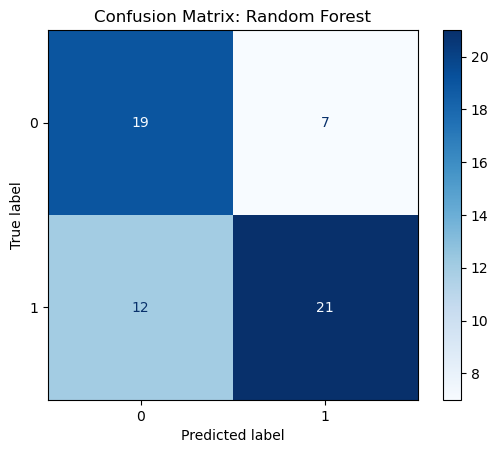

In [101]:
best_model = results[0]
ConfusionMatrixDisplay(best_model[5]).plot(cmap="Blues")
plt.title(f"Confusion Matrix: {best_model[0]}")
plt.show()

In [102]:
df['COMPLICATION'].value_counts()


COMPLICATION
1.0    146
2.0     64
Name: count, dtype: int64

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["No Complication", "Complication"]))


                 precision    recall  f1-score   support

No Complication       0.54      0.58      0.56        26
   Complication       0.65      0.61      0.62        33

       accuracy                           0.59        59
      macro avg       0.59      0.59      0.59        59
   weighted avg       0.60      0.59      0.59        59



In [107]:
for i, item in enumerate(best_model):
    print(f"{i}: {type(item)} -> {item}")



0: <class 'str'> -> Random Forest
1: <class 'float'> -> 0.6779661016949152
2: <class 'float'> -> 0.6814516129032258
3: <class 'float'> -> 0.6835664335664335
4: <class 'float'> -> 0.6775956284153005
5: <class 'numpy.ndarray'> -> [[19  7]
 [12 21]]
